In [1]:
from aqmodels import Solution, quicksum
from luna_quantum import Model as AqModel
from luna_quantum import algorithms
from luna_quantum.solve.parameters.algorithms.quantum_gate.flex_qaoa import (
    LinearOptimizerParams,
)

# Classical optimization

# Import model data
from model.data import ConventionCenter, Schedule, SessionChair
from model.model import optimization_model
from model.visualization import (
    plot_floor_plan,
    plot_satisfaction,
    solution_to_assignment,
)

# Import utils (from last notebook)
from utils import pretty


import logging
from luna_quantum import config, Logging

Logging.set_level(logging.NOTSET)
config.LUNA_LOG_DISABLE_SPINNER = True

%load_ext dotenv
%dotenv

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

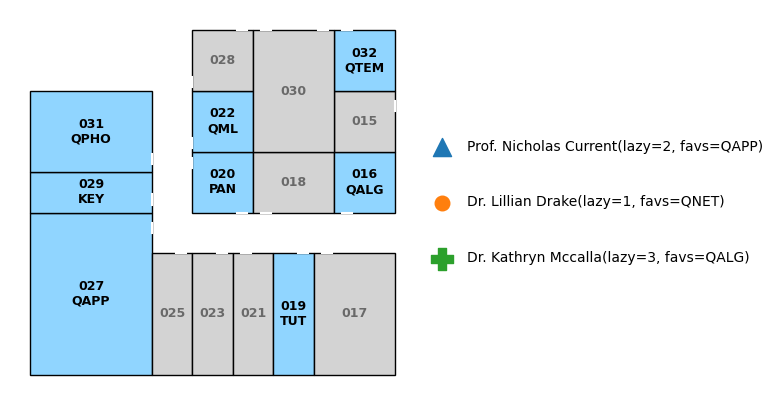

In [2]:
center = ConventionCenter.generate()
schedule = Schedule.random(8, center, seed=5)
chairs = SessionChair.random_chairs(3, seed=1)

satisfaction = 2

plot_floor_plan(center, schedule=schedule, chairs=chairs)

In [3]:
x, model = optimization_model(center, schedule, chairs, satisfaction=satisfaction)

In [4]:
for i in range(len(chairs)):
    model.add_constraint(
        quicksum(x[r, i] for r in schedule.keys()) <= 3, f"chair_capacity_{i}"
    )

print(model)

Model: Session chair assignment
Minimize
  11.2 * x_0_022 * x_0_032 + 9 * x_0_022 * x_0_016 + 4.6 * x_0_022 * x_0_027 
  + 2.2 * x_0_022 * x_0_031 + x_0_022 * x_0_020 + 3.4 * x_0_022 * x_0_029 
  + 8 * x_0_022 * x_0_019 + 5.6 * x_1_022 * x_1_032 + 4.5 * x_1_022 * x_1_016 
  + 2.3 * x_1_022 * x_1_027 + 1.1 * x_1_022 * x_1_031 + 0.5 * x_1_022 * x_1_020 
  + 1.7 * x_1_022 * x_1_029 + 4 * x_1_022 * x_1_019 + 16.8 * x_2_022 * x_2_032 
  + 13.5 * x_2_022 * x_2_016 + 6.9 * x_2_022 * x_2_027 + 3.3 * x_2_022 * x_2_031
  + 1.5 * x_2_022 * x_2_020 + 5.1 * x_2_022 * x_2_029 + 12 * x_2_022 * x_2_019 
  + 20.2 * x_0_032 * x_0_016 + 16 * x_0_032 * x_0_027 + 13 * x_0_032 * x_0_031 
  + 12.2 * x_0_032 * x_0_020 + 14.6 * x_0_032 * x_0_029 
  + 19.2 * x_0_032 * x_0_019 + 10.1 * x_1_032 * x_1_016 + 8 * x_1_032 * x_1_027 
  + 6.5 * x_1_032 * x_1_031 + 6.1 * x_1_032 * x_1_020 + 7.3 * x_1_032 * x_1_029 
  + 9.6 * x_1_032 * x_1_019 + 30.3 * x_2_032 * x_2_016 + 24 * x_2_032 * x_2_027 
  + 19.5 * x_2_032 * x_2_

In [11]:
fqaoa = algorithms.FlexQAOA(reps=100, optimizer=LinearOptimizerParams())
sol = fqaoa.run(AqModel.decode(model.encode())).result()
sol = Solution.decode(sol.encode())
pretty(sol)

x_0_022,x_1_022,x_2_022,x_0_032,x_1_032,x_2_032,x_0_016,x_1_016,x_2_016,x_0_027,x_1_027,...
0,1,0,0,1,0,0,0,1,1,0,
0,1,0,0,1,0,0,0,1,1,0,
1,0,0,0,1,0,0,0,1,1,0,
1,0,0,0,1,0,0,0,1,0,1,
0,1,0,0,1,0,0,0,1,1,0,
1,0,0,0,1,0,0,0,1,1,0,
0,1,0,0,1,0,0,0,1,0,1,
1,0,0,0,1,0,0,0,1,1,0,
0,1,0,0,1,0,1,0,0,0,0,
1,0,0,0,1,0,0,0,1,0,1,


(<Figure size 1000x500 with 1 Axes>, <Axes: >)

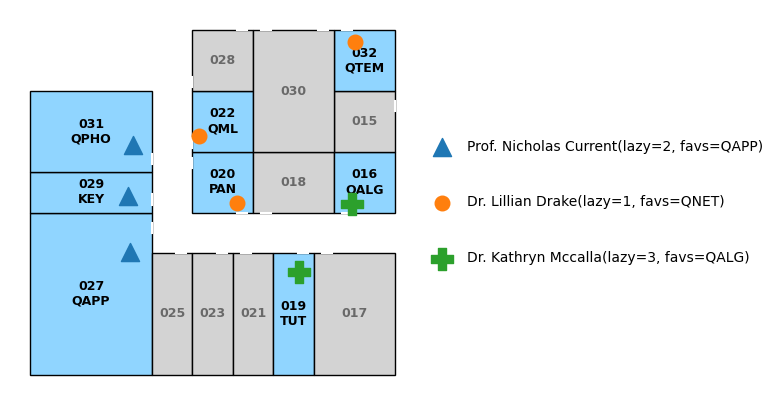

In [8]:
best = sol.best()
assignment = solution_to_assignment(x, best, chairs)
plot_floor_plan(center, schedule=schedule, chairs=chairs, assignment=assignment)

(<Figure size 300x300 with 1 Axes>, <Axes: ylabel='Satisfaction'>)

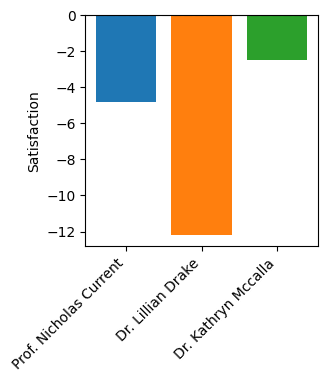

In [9]:
plot_satisfaction(center, schedule, chairs, assignment)